### Importing Relevent Library

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set() # all plot will cover on seaborn style

### Loading the Data.

In [230]:
car_raw = pd.read_csv('1.04. Real-life-example.csv')
car_raw.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


- **Brand** – The manufacturer of the car.  
- **Price** – The selling price of the car, which is the target variable.  
- **Body** – The type or category of the car.  
- **Mileage** – The total distance the car has been driven. Since this is a second-hand car price prediction project, higher mileage generally leads to a lower price.  
- **EngineV** – The engine volume of the car. Sports cars usually have larger engines and higher prices, while economy cars tend to have smaller engines and lower prices.  
- **Registration** – Indicates whether the car has valid registration documents.  
- **Year** – The manufacturing year of the car, representing when the first owner purchased it. Older cars typically have lower prices.  
- **Model** – The specific model of the car.  

### Preprocessing the Raw Data

In [231]:
# getting descriptive stats
car_raw.describe(include='all')
# use include = all for getting categorical column also.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


The `Model` column contains 312 unique car models. Converting it into dummy variables would significantly increase the dataset’s dimensions by adding 312 extra columns.  

Additionally, we assume this dataset represents second-hand car prices. As cars age, the specific model becomes less relevant, whereas the `Brand` still influences the price.  

For these reasons, we have decided to drop the `Model` column from the dataset.

In [232]:
#dropping the model column
car_raw.drop('Model', axis=1, inplace=True)
car_raw.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00


### Checking missing values

In [233]:
car_raw.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

The `Price` and `EngineV` columns are the only ones with missing values, but only a small portion of the data is affected.  

According to the **Rule of Thumb**, if we remove **5% or less** of the total data, it is considered safe.  

In our case, **172 out of 4,344** entries are missing, which equals **0.0395 (or ~3%)** of the dataset. Since this is well within the acceptable range, we can safely drop these rows.

In [234]:
# dropping missing values
car_raw.dropna(axis=0, inplace=True)

# axis=1 means we are removing rows not columns
print('Missing value Droped')

Missing value Droped


### Exploring Probability Distibutions. (PDFs)

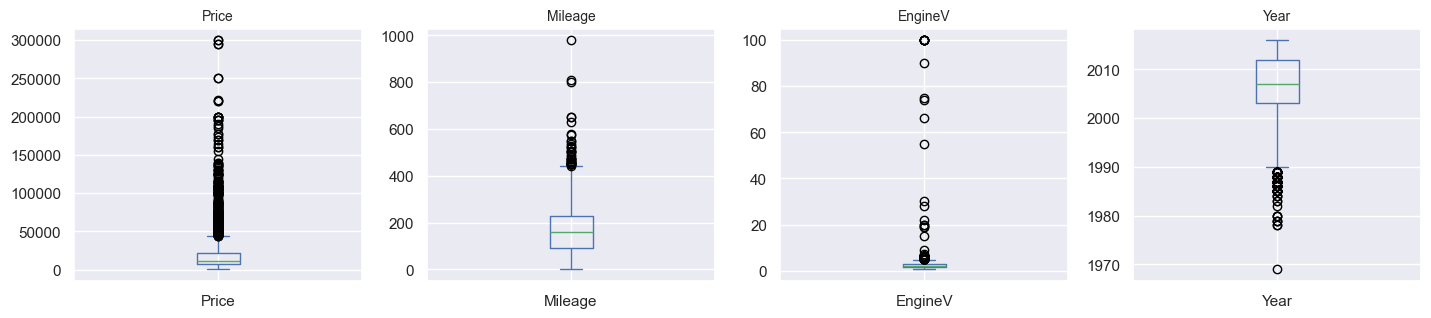

In [235]:
plt.figure(figsize=(18, 12))

numeric_columns = car_raw.select_dtypes(include='number').columns

for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(4, 5, i)
    car_raw[column].plot(kind='box')
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

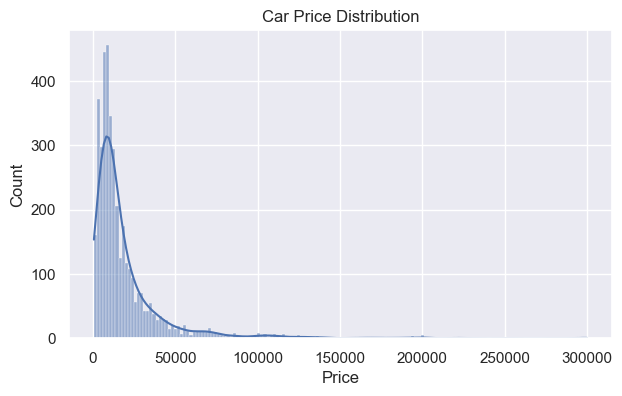

In [236]:
plt.figure(figsize=(7,4))
sns.histplot(car_raw['Price'], kde=True);
plt.title('Car Price Distribution');

We can see from the plot that this column 'Price' consist outlier

### Dealing with outlier.

The one way is to do that is getting 99% of total data and removing 1% of data.

for that we used pandas `.quantile()` methode

In [237]:
q = car_raw['Price'].quantile(q = 0.99) # it return a single value
q

np.float64(129812.51999999981)

In [238]:
# updating the data
car_1 = car_raw[car_raw['Price']<q]
car_1.describe() # checking the data.

,Price,Mileage,EngineV,Year
count,3984.00,3984.00,3984.00,3984.00
mean,17837.12,165.12,2.74,2006.29
std,18976.27,102.77,4.96,6.67
min,600.00,0.00,0.60,1969.00
25%,6980.00,93.00,1.80,2002.75
50%,11400.00,160.00,2.20,2007.00
75%,21000.00,230.00,3.00,2011.00
max,129222.00,980.00,99.99,2016.00


After dealing with the given outlier values og "Price" column we can see that the values are reduced significantly

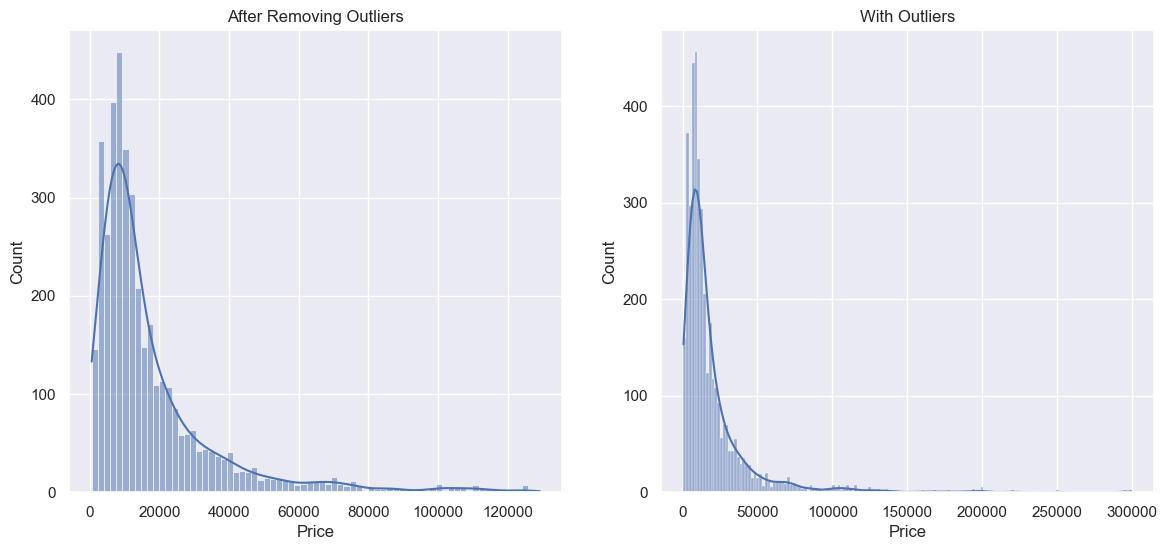

In [239]:
plt.figure(figsize=(14,6))
# plotting distribution graph with seaborn
# plotting the Target Column prices
plt.subplot(1,2,1)
sns.histplot(car_1['Price'], kde=True)
plt.title('After Removing Outliers')

plt.subplot(1,2,2)
sns.histplot(car_raw['Price'], kde=True)
plt.title('With Outliers')
plt.show()

Now the outliars are far away, Now we can see the Price is more generalized way.

### This similar issue we also have with others columns like `Mileage`, `EngineV` and `Year`

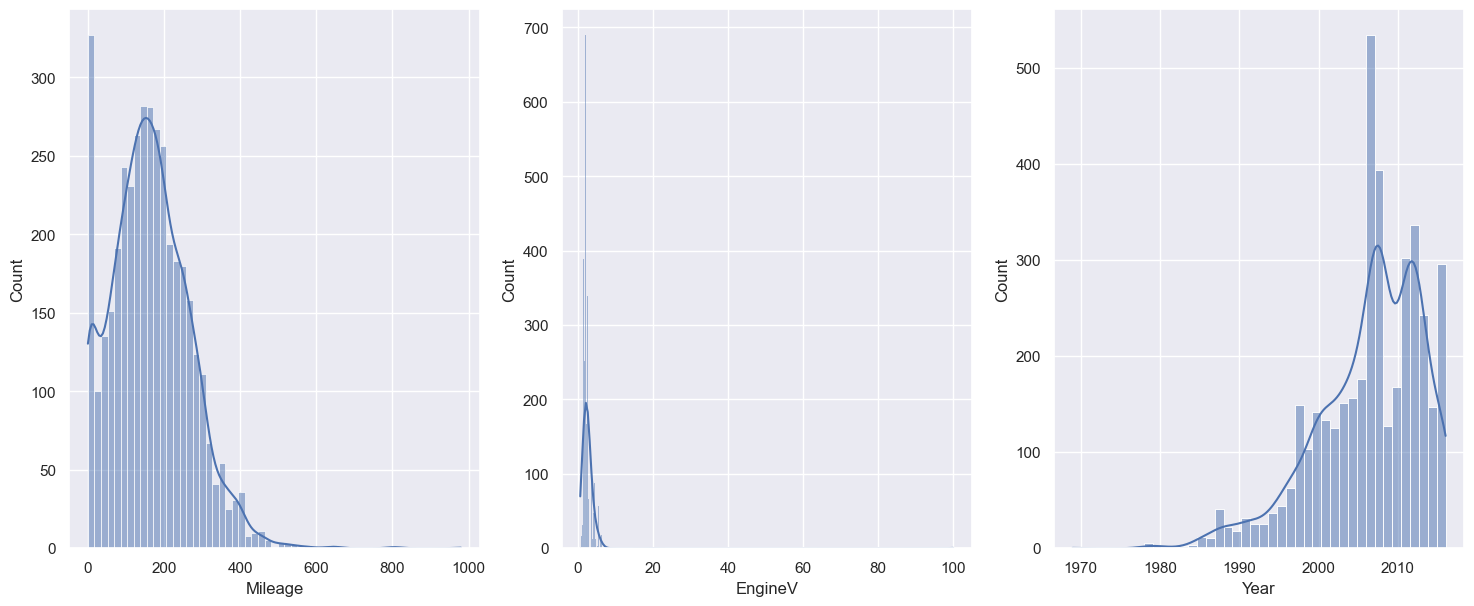

In [240]:
# potting athers numerical columns
plt.figure(figsize=(18,7))

plt.subplot(1,3,1)
sns.histplot(car_1['Mileage'], kde=True)

plt.subplot(1,3,2)
sns.histplot(car_raw['EngineV'], kde=True)

plt.subplot(1,3,3)
sns.histplot(car_raw['Year'], kde=True)
plt.show()

The same things is also here. I will perform the same processing here also, kepping only 99% data

In [241]:
## Mileage Column.
q = car_1['Mileage'].quantile(0.99)  # it return a single value
car_2  = car_1[car_1['Mileage']<q]

Text(0.5, 1.0, 'After Removing Outliars')

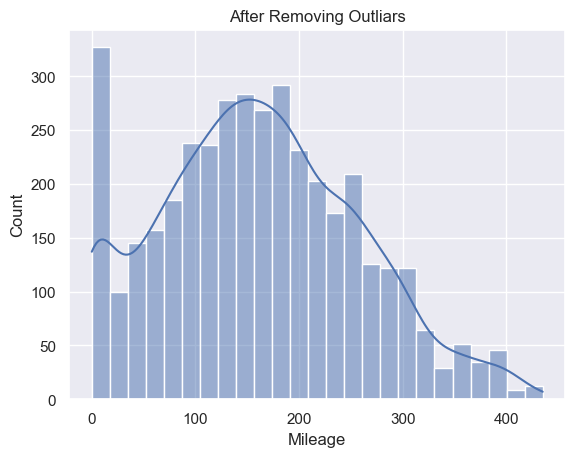

In [242]:
# plotting the Milage column
sns.histplot(car_2['Mileage'], kde=True)
plt.title('After Removing Outliars')

Now the is much look like normally distributed.

## The EngineV 

Text(0.5, 1.0, 'Car Engine Volume')

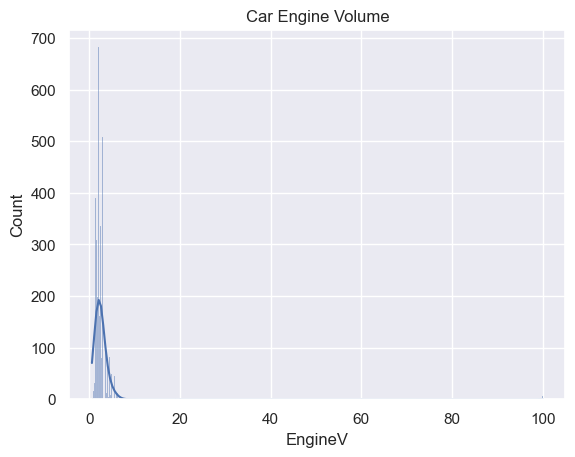

In [243]:
# plotting the enginev column
sns.histplot(car_2['EngineV'], kde=True)
plt.title('Car Engine Volume')

The engine car volume have bad data. 
No such car are ther with 100 engine volume.

Google search found that the interval should fall on `0.6 to 6.5` for car engine volume.

Text(0.5, 1.0, 'Real Values on Engine Volume')

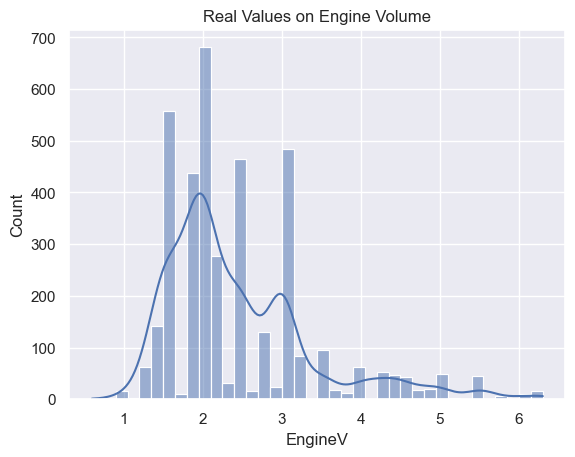

In [244]:
# as here i know the max engine volume can be is 6.5

car_3 = car_2[car_2['EngineV']<6.5]

# plotting the values again
sns.histplot(car_3['EngineV'], kde=True)
plt.title('Real Values on Engine Volume')

## `Year`

Text(0.5, 1.0, 'Year of the car')

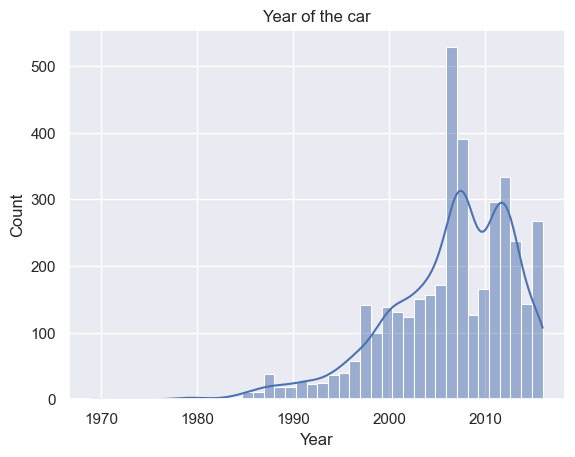

In [245]:
#plotting the year column
sns.histplot(car_3['Year'], kde=True)
plt.title('Year of the car')

Here we find that year also have outlier but in early term i.e we will remove every data which is less than 0.01


Text(0.5, 1.0, 'Year after removign old year')

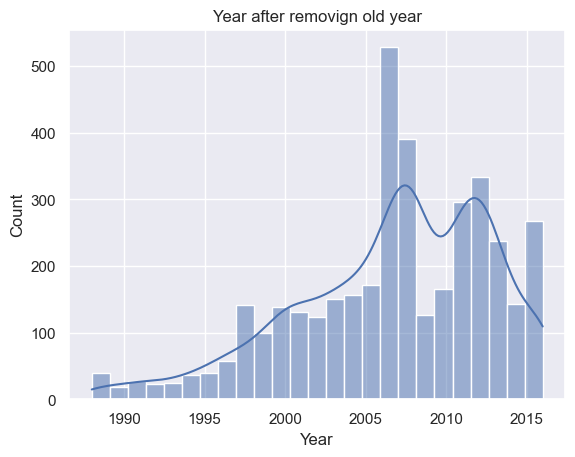

In [246]:
# this time i will keep only 1% data and remove the 99th percentile.
q = car_3['Year'].quantile(0.01)
car_4 = car_3[car_3['Year']>q] # removing the 1th percentile data

# potting again
sns.histplot(car_4['Year'], kde=True)
plt.title('Year after removign old year')

In [247]:
car_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008
4339,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999


After dealing with datas we find that index is messed up so we reset index using pandas function .reset_index()

In [248]:
# reset the indexes
car_clean = car_4.reset_index(drop=True)

# checiking the data
car_clean

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008
3863,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014
3864,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014
3865,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999


In [249]:
car_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


Now the row are matching with.

In [250]:
car_raw.shape[0] -  car_clean.shape[0]

158

We have removed a total of 158 rows from the raw data.

However, the original number of removed rows is 158 + 172 = 330, as we had already removed the missing values at the beginning.

In [251]:
# saving the data for next modeule

car_clean.to_csv('Car_cleaned.csv', index=False)
print('Data Saved')

Data Saved


### Importing Relevent Library

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # all plot will cover on seaborn style

### Loading the Data.

In [253]:
car_raw = pd.read_csv('1.04. Real-life-example.csv')
car_raw.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


### Preprocessing the Raw Data

In [254]:
# getting descriptive stats
car_raw.describe(include='all')
# use include = all for getting categorical column also.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


### Checking missing values

In [255]:
car_raw.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [256]:
# dropping missing values
car_raw.dropna(axis=0, inplace=True)

# axis=1 means we are removing rows not columns
print('Mssing value Droped')

Mssing value Droped


### Exploring Probability Distibutions. (PDFs)

Text(0.5, 1.0, 'Car Price Distribution')

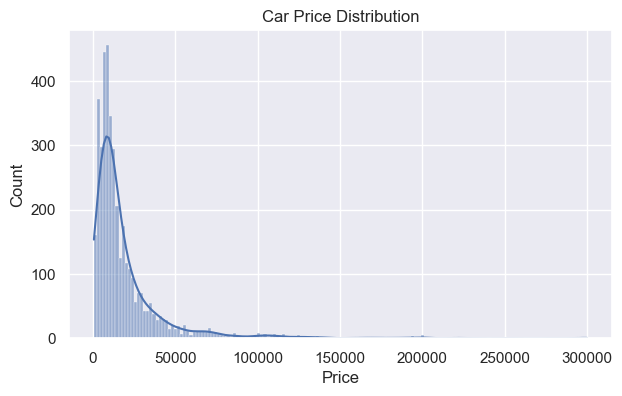

In [257]:
plt.figure(figsize=(7,4))
sns.histplot(car_raw['Price'],kde=True)
plt.title('Car Price Distribution')

If we check the price range, the values are lies in very strage order. also there are some outliar.

### Dealing with outlier.

The one way is to do that is getting 99% of total data and removing 1% of data.

for that I will use pandas `.quantile()` method

In [258]:
q = car_raw['Price'].quantile(q = 0.99) # it return a single value
q

np.float64(129812.51999999981)

In [259]:
# updating the data
car_1 = car_raw[car_raw['Price']<q]
car_1.describe() # checking the data.

,Price,Mileage,EngineV,Year
count,3984.00,3984.00,3984.00,3984.00
mean,17837.12,165.12,2.74,2006.29
std,18976.27,102.77,4.96,6.67
min,600.00,0.00,0.60,1969.00
25%,6980.00,93.00,1.80,2002.75
50%,11400.00,160.00,2.20,2007.00
75%,21000.00,230.00,3.00,2011.00
max,129222.00,980.00,99.99,2016.00


Now if we compare from above describe then we can see the `Price` max value has been relaxed, but it also very far from its mean, but it is acceptable.

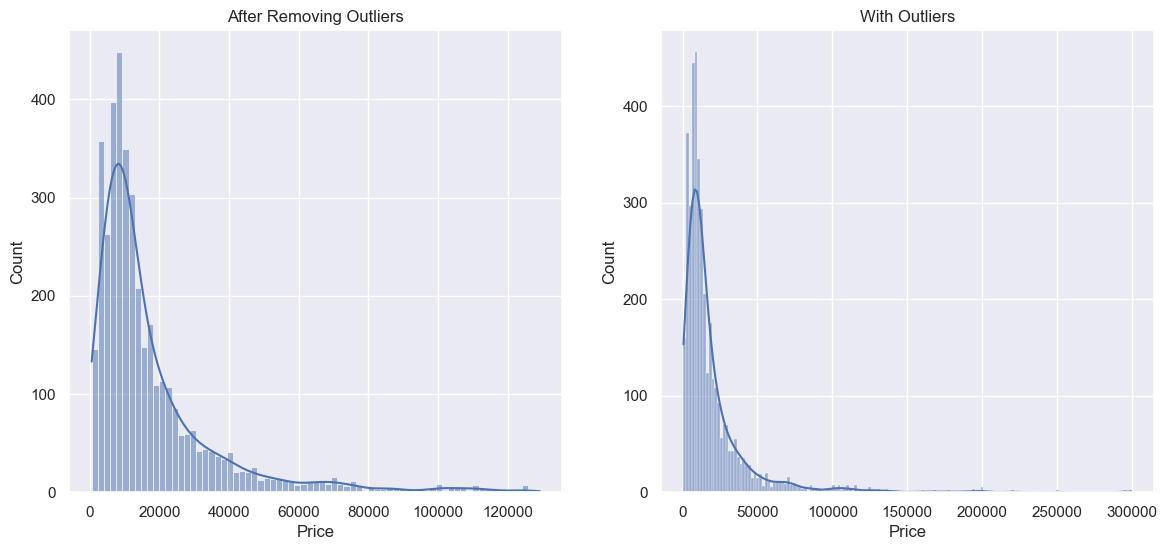

In [260]:
plt.figure(figsize=(14,6))
# plotting distribution graph with seaborn
# plotting the Target Column prices
plt.subplot(1,2,1)
sns.histplot(car_1['Price'],kde=True)
plt.title('After Removing Outliers')


plt.subplot(1,2,2)
sns.histplot(car_raw['Price'],kde=True)
plt.title('With Outliers')
plt.show()

Now the outliars are far away, Now we can see the Price is more generalized way.

### This similar issue we also have with others columns like `Mileage`, `EngineV` and `Year`

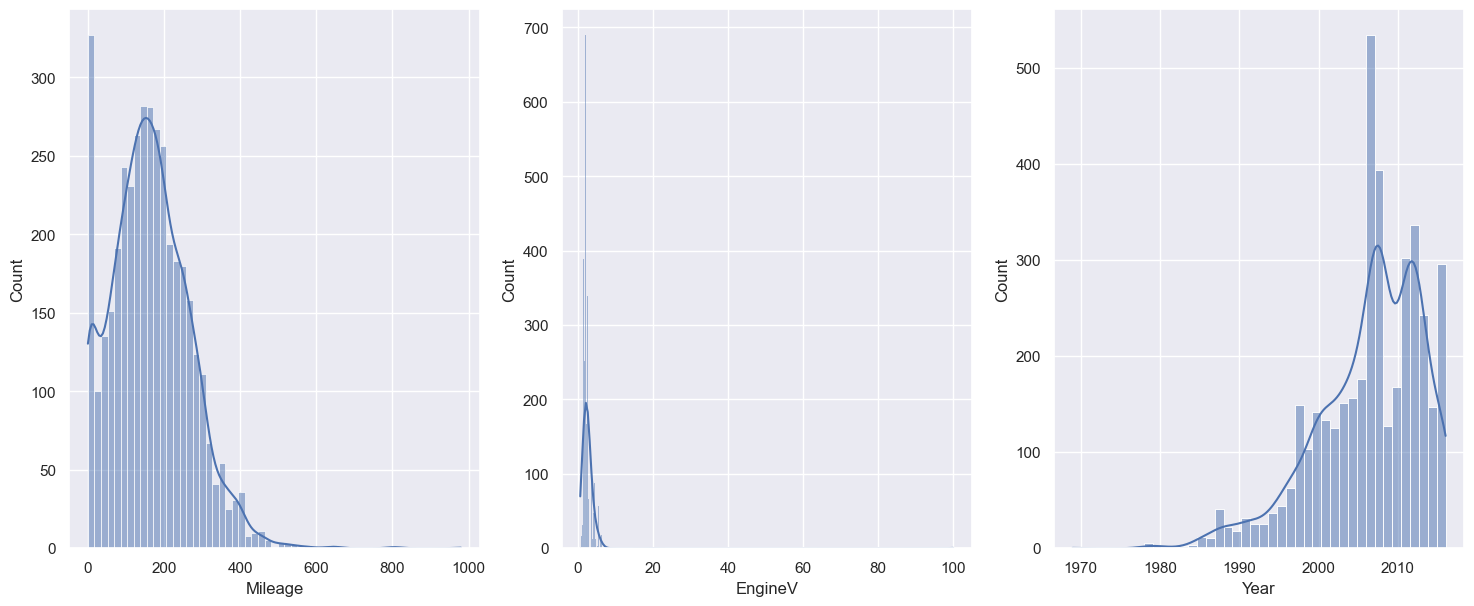

In [261]:
# potting athers numerical columns
plt.figure(figsize=(18,7))

plt.subplot(1,3,1)
sns.histplot(car_1['Mileage'],kde= True)

plt.subplot(1,3,2)
sns.histplot(car_raw['EngineV'],kde= True)

plt.subplot(1,3,3)
sns.histplot(car_raw['Year'],kde= True)
plt.show()

The same things is also here. I will perform the same processing here also, kepping only 99% data

In [262]:
## Mileage Column.
q = car_1['Mileage'].quantile(0.99)  # it return a single value
car_2  = car_1[car_1['Mileage']<q]

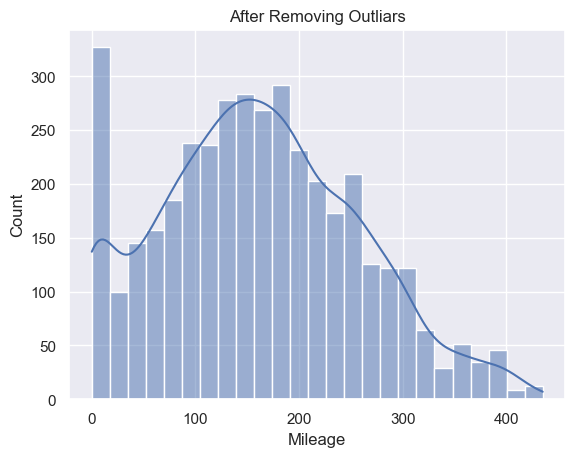

In [263]:
# plotting the Milage column
sns.histplot(car_2['Mileage'],kde=True);
plt.title('After Removing Outliars');

Now the is much look like normally distributed.

## The EngineV 

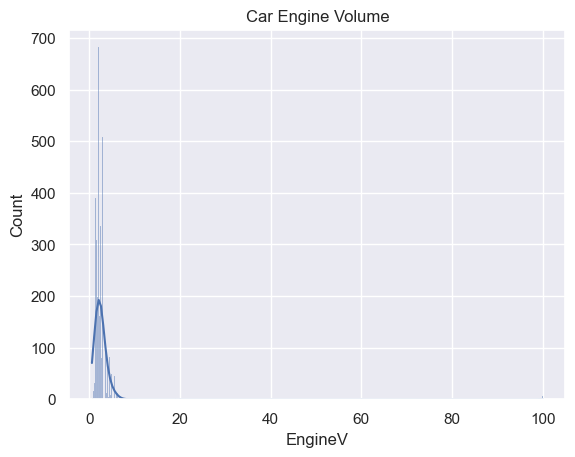

In [264]:
# plotting the enginev column
sns.histplot(car_2['EngineV'],kde=True)
plt.title('Car Engine Volume')
plt.show()

The engine car volume have bad data. 
No such car are ther with 100 engine volume.

Google search found that the interval should fall on `0.6 to 6.5` for car engine volume.

Text(0.5, 1.0, 'Real Values on Engine Volume')

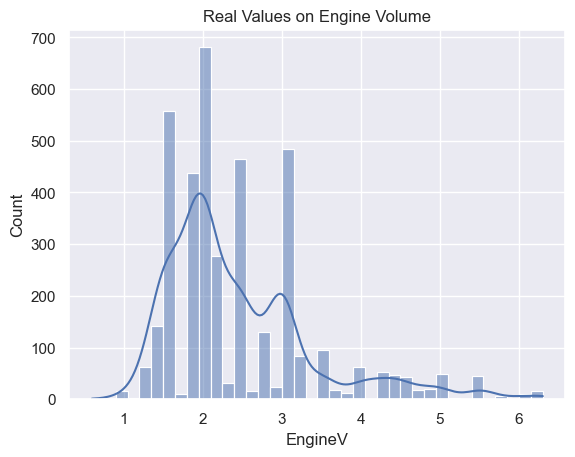

In [265]:
# as here i know the max engine volume can be is 6.5

car_3 = car_2[car_2['EngineV']<6.5]

# plotting the values again
sns.histplot(car_3['EngineV'],kde=True)
plt.title('Real Values on Engine Volume')

## `Year`

Text(0.5, 1.0, 'Year of the car')

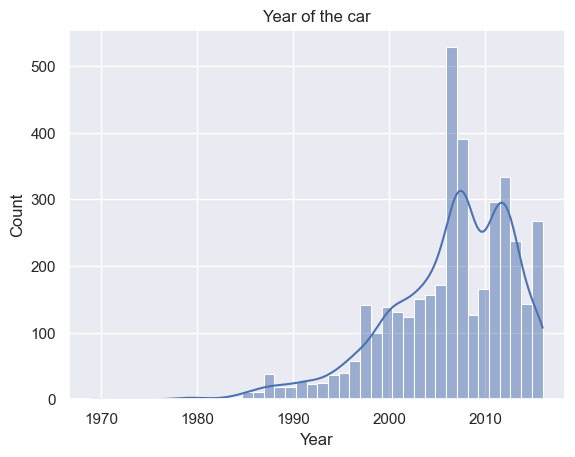

In [266]:
#plotting the year column
sns.histplot(car_3['Year'],kde=True)
plt.title('Year of the car')

Now here the problem is kind of opposite. the most car are newer like after 2000, but also there are few car which is older than 1990.

As i notice that the `Year` Column is treated like other numerical column not datetype.

Text(0.5, 1.0, 'Year after removign old year')

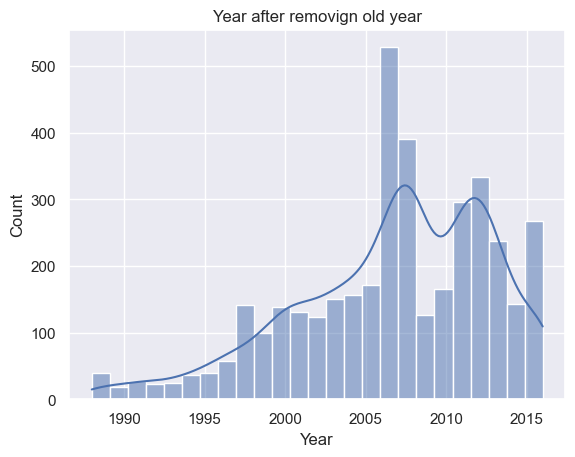

In [267]:
# this time i will keep only 1% data and remove the 99th percentile.
q = car_3['Year'].quantile(0.01)
car_4 = car_3[car_3['Year']>q] # removing the 1th percentile data

# potting again
sns.histplot(car_4['Year'],kde=True)
plt.title('Year after removign old year')

In [268]:
car_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,S 350
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,535


Now from here i can see that the index is little messed up. It is because we have remove some row from the data but the index is showing fron the raw data . that is why the last index value is not matching with total no of rows.

In [269]:
# reset the indexes
car_clean = car_4.reset_index(drop=True)

# checiking the data
car_clean

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,T5 (Transporter)
3863,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,Corolla
3864,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,S 350
3865,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,535


In [270]:
car_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71,NaN
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10,NaN
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00,NaN
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00,NaN


Now the row are matching with.

In [271]:
car_raw.shape[0] -  car_clean.shape[0]

158

I have remove total 158 rows from the raw data.

But the original number is `158 + 172 = 330`. because i have remove null value in the begining.

In [272]:
# saving the data for next modeule

car_clean.to_csv('Car_cleaned_with_Model.csv', index=False)
print('Data Saved')

Data Saved


In [273]:
sns.set_palette('deep')

In [274]:
car=pd.read_csv('Car_cleaned_with_Model.csv')
car.head()
df=car.copy()
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


In [275]:
df.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

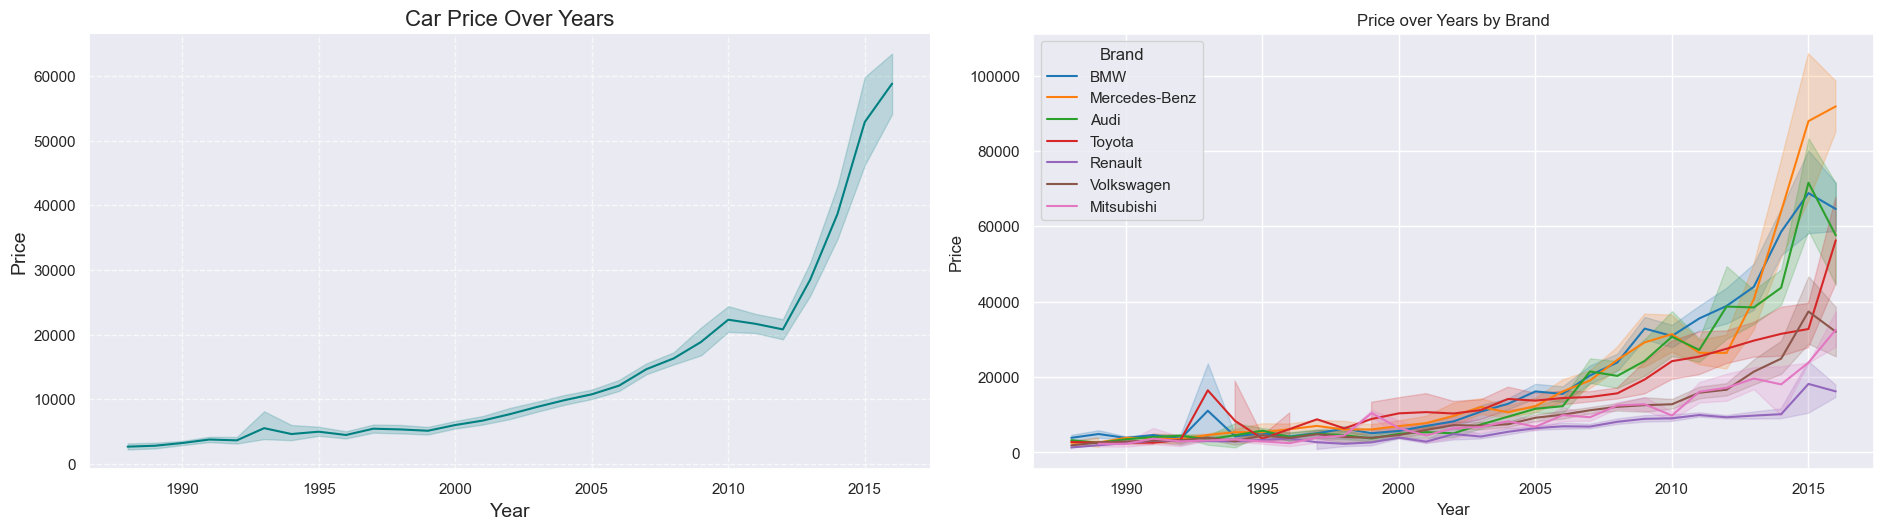

In [276]:
plt.figure(figsize=(19, 10))
plt.subplot(2,2,1)
sns.lineplot(x='Year', y='Price', data=df, color='teal')
plt.title('Car Price Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
sns.despine()
plt.grid(True, linestyle='--', alpha=0.7)


plt.subplot(2,2,2)
sns.lineplot(data=car, x='Year', y='Price', hue='Brand', palette='tab10')
plt.title('Price over Years by Brand')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(title='Brand')
plt.tight_layout()
plt.show()



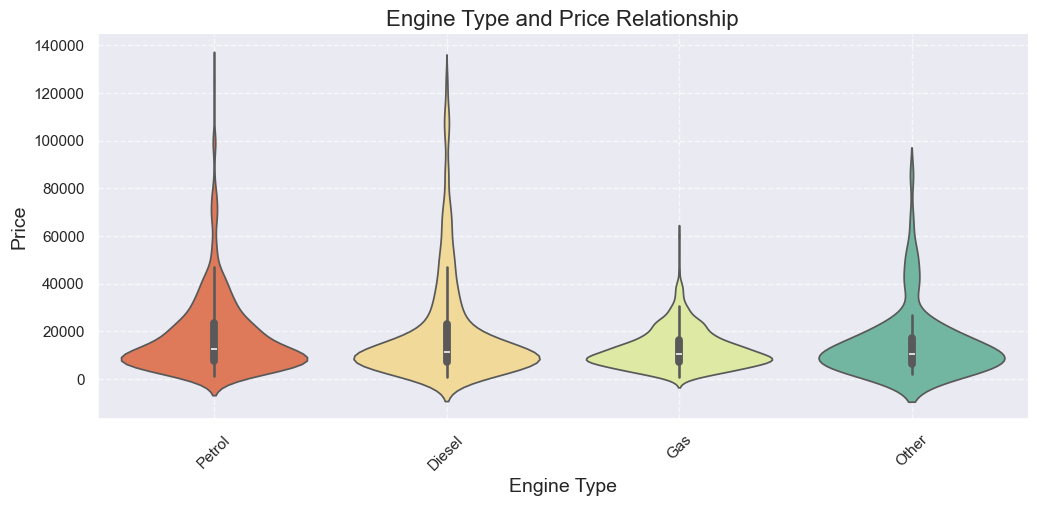

In [277]:

plt.figure(figsize=(12, 5))
sns.violinplot(x='Engine Type', y='Price', hue='Engine Type', data=car, palette='Spectral', legend=False)
plt.title('Engine Type and Price Relationship', fontsize=16)
plt.xlabel('Engine Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
sns.despine()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

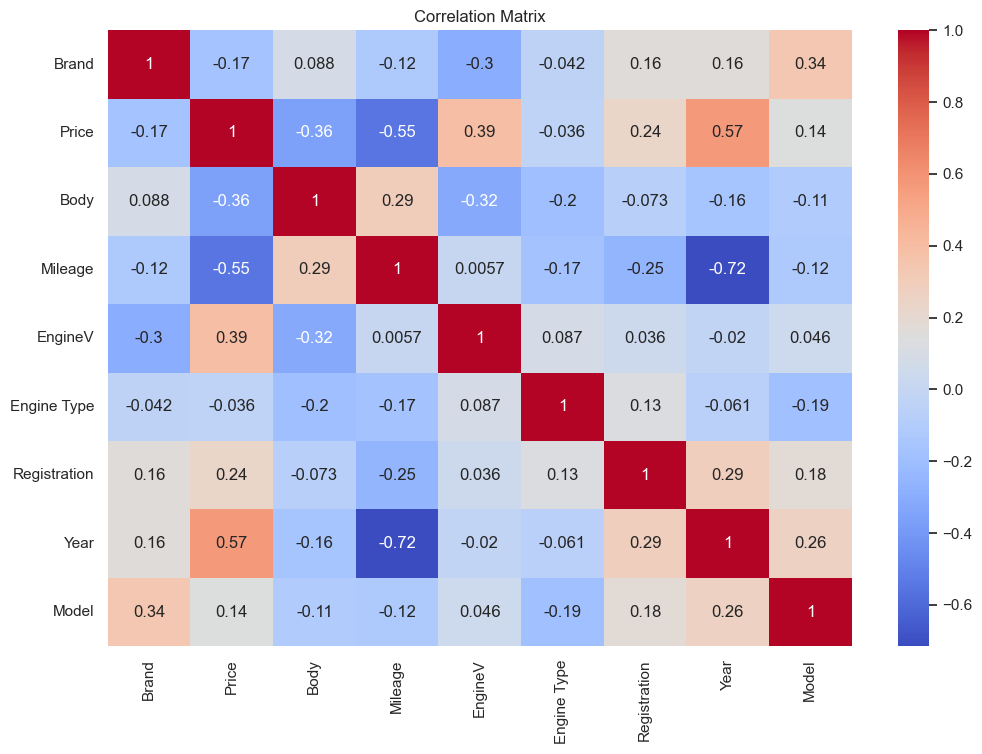

In [278]:
plt.figure(figsize=(12, 8))

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in car.columns:
    if car[i].dtypes == 'object':
        car[i] = le.fit_transform(car[i])

sns.heatmap(car.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

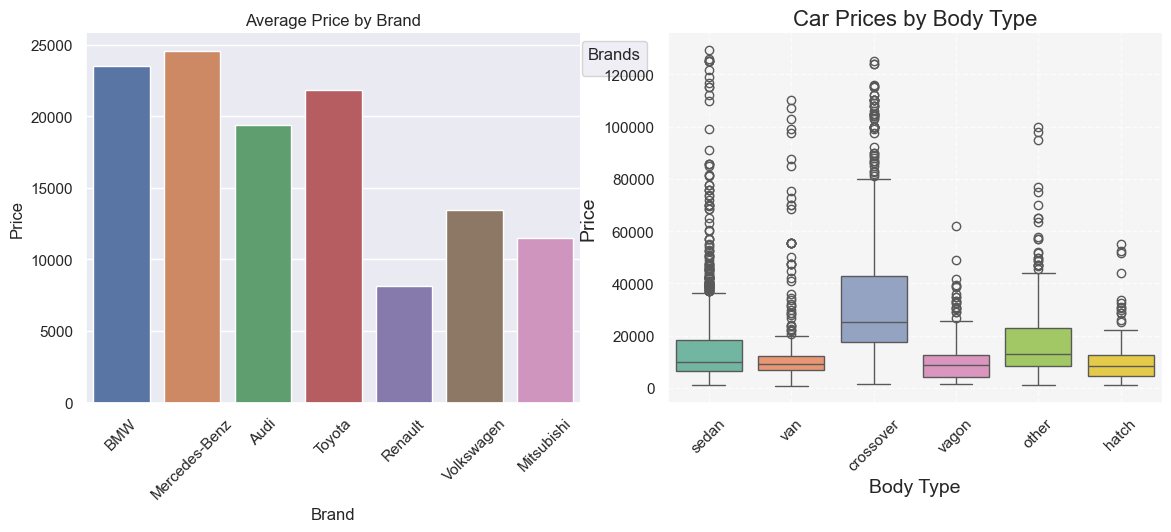

In [279]:
plt.figure(figsize=(18, 15))

# First subplot: Bar Plot
plt.subplot(3, 3, 1)
bar_plot = sns.barplot(data=df, x='Brand', y='Price', errorbar=None, hue='Brand')
plt.title('Average Price by Brand')
plt.xticks(rotation=45)
handles, labels = bar_plot.get_legend_handles_labels()
plt.legend(handles, labels, title='Brands', loc='upper right', bbox_to_anchor=(1.15, 1))  # Add legend
plt.tight_layout(pad=2.0)  # Adjust padding

# Second subplot: Box Plot
plt.subplot(3, 3, 2)
box_plot = sns.boxplot(x='Body', y='Price', hue='Body', data=df, palette='Set2', legend=False)
plt.title('Car Prices by Body Type', fontsize=16)
plt.xlabel('Body Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
sns.despine()
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a background color
plt.gca().set_facecolor('whitesmoke')


plt.show()

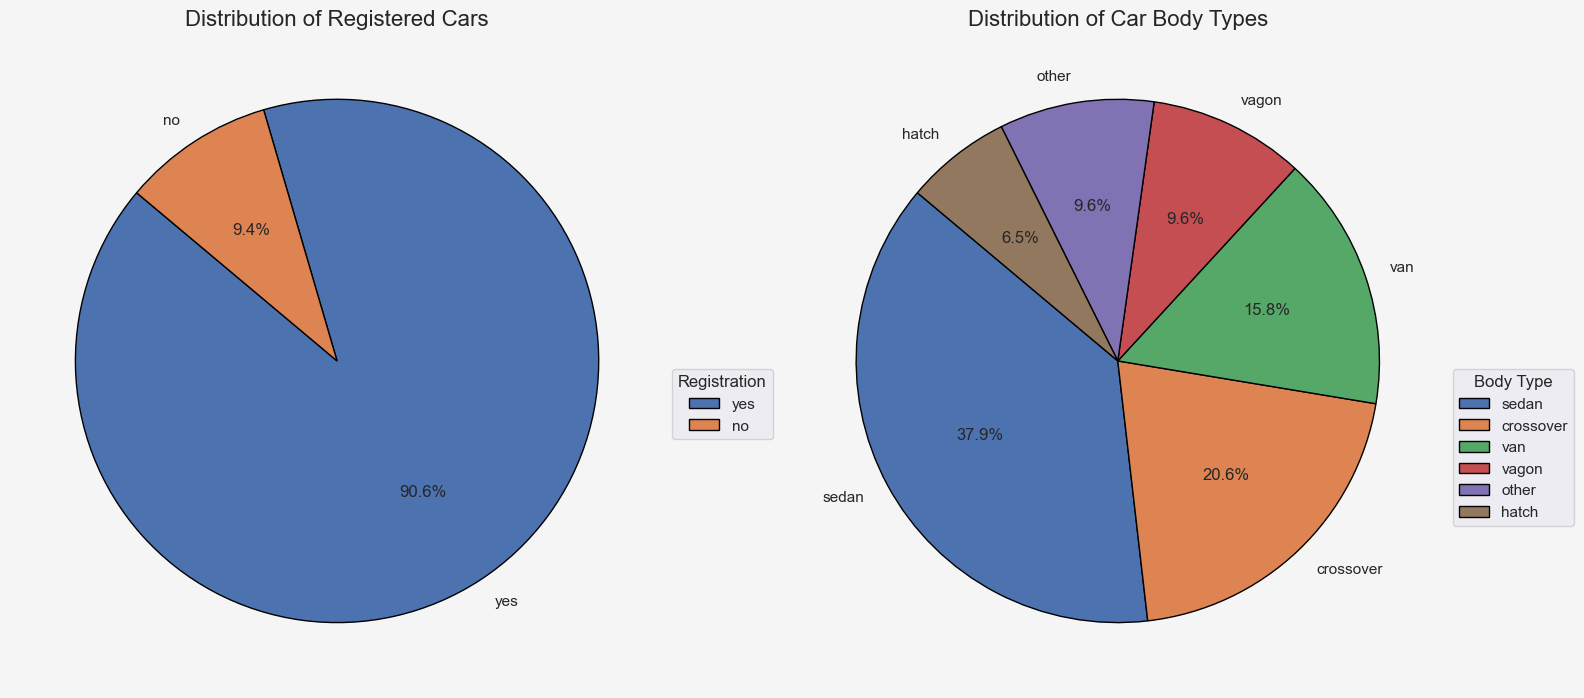

In [280]:


# Create a figure with a grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

# Colors for the pie charts
colors_registered = sns.color_palette('Set2')
colors_body = sns.color_palette('Set3')

# Distribution of Registered Cars
registered_counts = df['Registration'].value_counts()
axes[0].pie(registered_counts, labels=registered_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
axes[0].set_title('Distribution of Registered Cars', fontsize=16)
axes[0].legend(registered_counts.index, title='Registration', loc='best', bbox_to_anchor=(1, 0.5))

# Distribution of Car Body Types
body_counts = df['Body'].value_counts()
axes[1].pie(body_counts, labels=body_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Distribution of Car Body Types', fontsize=16)
axes[1].legend(body_counts.index, title='Body Type', loc='best', bbox_to_anchor=(1, 0.5))

# Adding a background color
fig.patch.set_facecolor('whitesmoke')

plt.tight_layout()
plt.show()


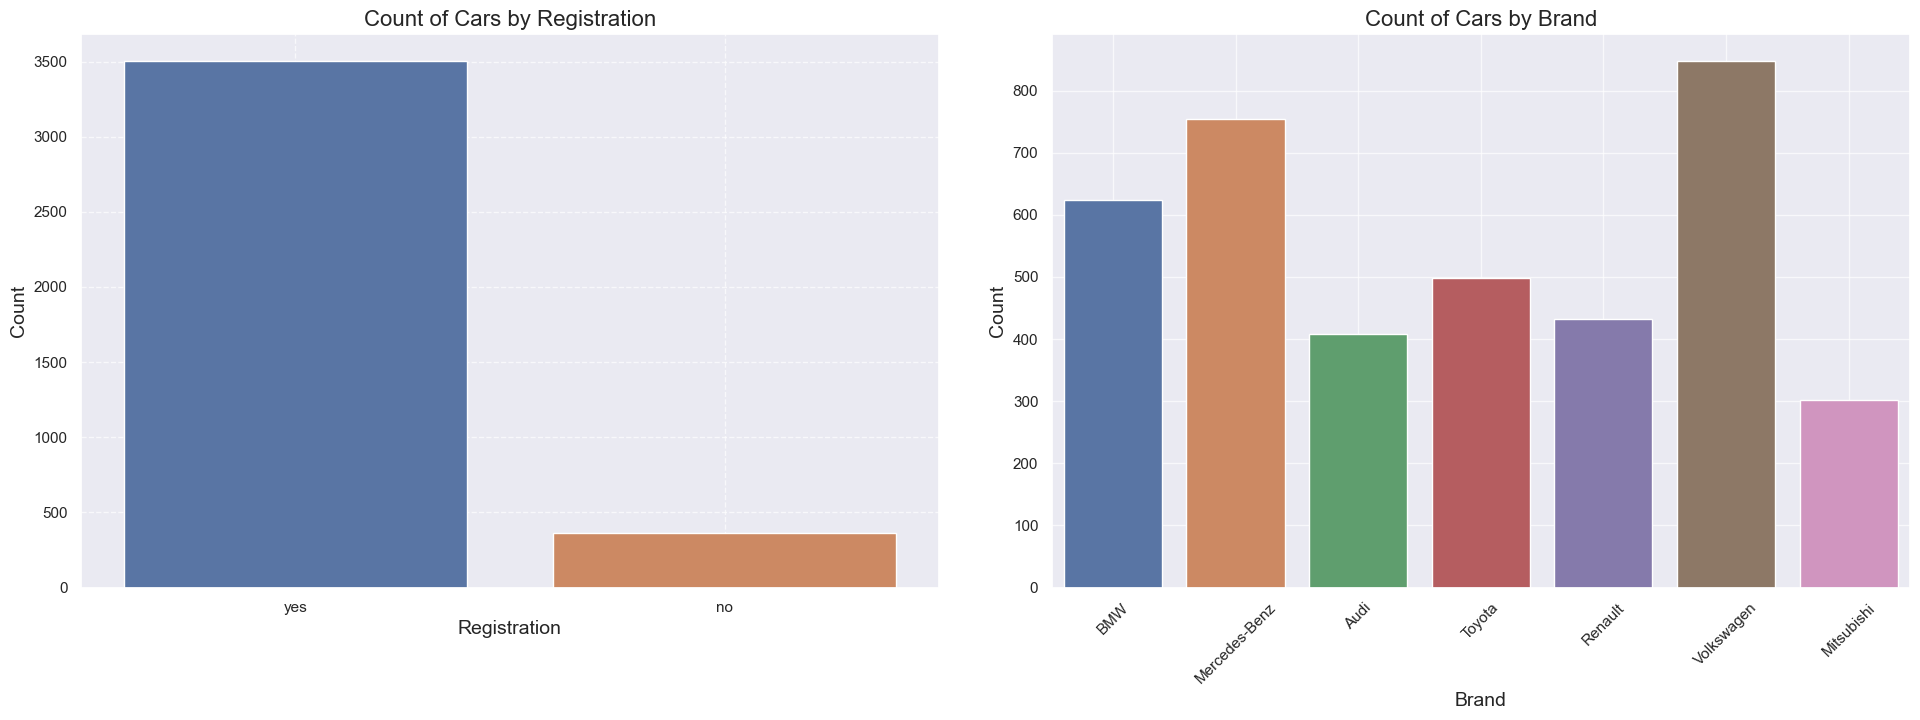

In [281]:
plt.figure(figsize=(20, 8))

# First subplot: Count Plot for Registration
plt.subplot(1, 2, 1)
sns.countplot(x='Registration', hue='Registration', data=df, legend=False)
plt.title('Count of Cars by Registration', fontsize=16)
plt.xlabel('Registration', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Second subplot: Count Plot for Brand
plt.subplot(1, 2, 2)
sns.countplot(x='Brand', hue='Brand', data=df, legend=False)
plt.title('Count of Cars by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.7)

plt.tight_layout(pad=3.0)
plt.show()

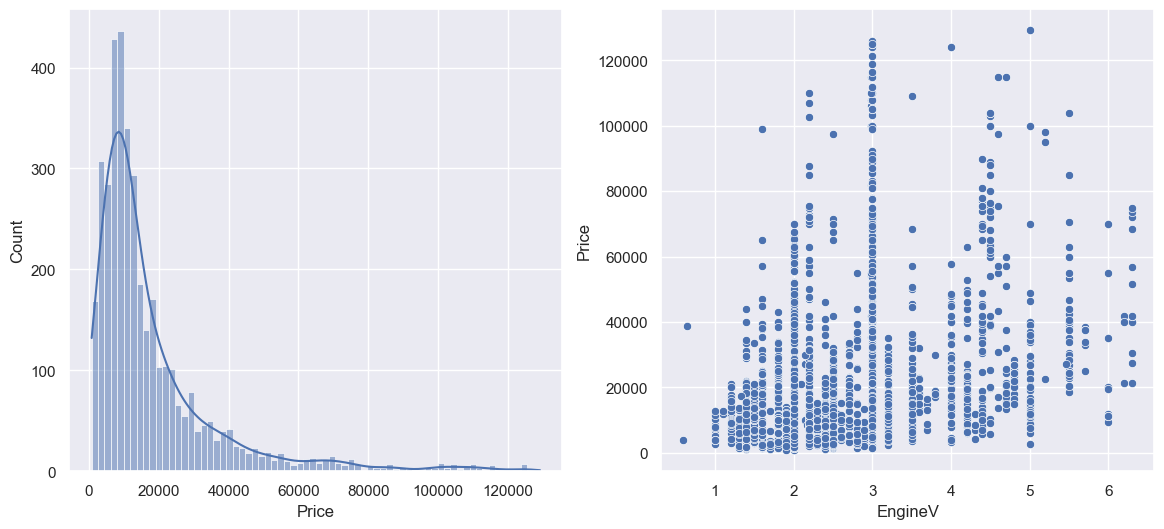

In [282]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['Price'], kde=True, ax=axes[0])
sns.scatterplot(x='EngineV', y='Price', data=df, ax=axes[1])
plt.show()

### After clean the Car now i have decied to use `Linear Regression` for the prediction.

So for use that i have to make some assumtion and make them true so it can give me support fot use the `Linear Regression`.

Because I know that `Linear Regression` algorith only work when the relation with features with the target column is linear.

I don't need to focus the categorical columns because those will be converted as dummies variable. 

all I have problem with numerical columns. like `Mileage`, `EngineV`, and `Year`

In [283]:
# loading the data
car = pd.read_csv('Car_cleaned_with_Model.csv')
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


Text(0.5, 1.0, 'Mileage Vs Price')

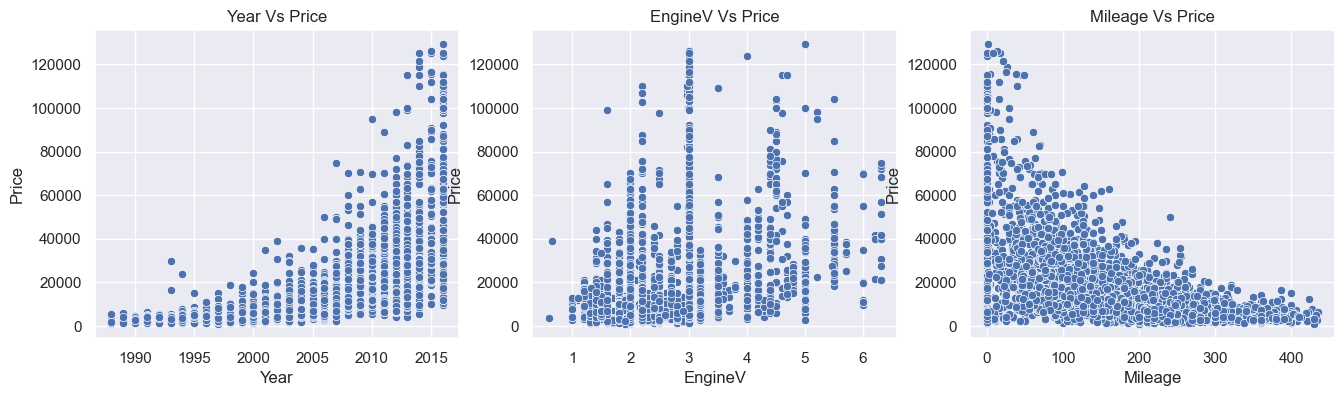

In [284]:
# plotting all the three numerical columns
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.scatterplot(x=car['Year'], y=car['Price'])
plt.title('Year Vs Price')

plt.subplot(1,3,2)
sns.scatterplot(x=car['EngineV'], y=car['Price'])
plt.title('EngineV Vs Price')

plt.subplot(1,3,3)
sns.scatterplot(x=car['Mileage'], y=car['Price'])
plt.title('Mileage Vs Price')


#### Now I can see that the relation is anything but not linear. I can not run `Linear Regression` in here.

We have to transform these column

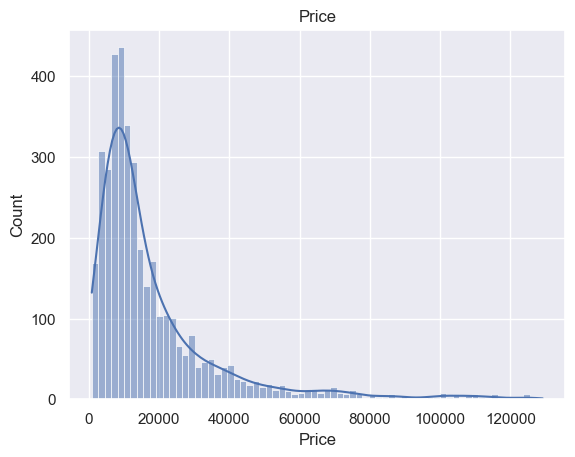

In [285]:
## Checking the price
sns.histplot(car['Price'],kde=True)
plt.title('Price')
plt.show()

The problem lies with the price, the price we have in the data is not linear.

Common approch form many others to transform the data is `log transformation`.

`Numpy` has a methode which calculate natural log which is `np.log(x)` it return natural logarithm of a number or arrays.

In [286]:
# transfor the price
log_price = np.log(car['Price'])

# adding another column 
car['log_price'] = log_price

# checking the data again
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4,9.81


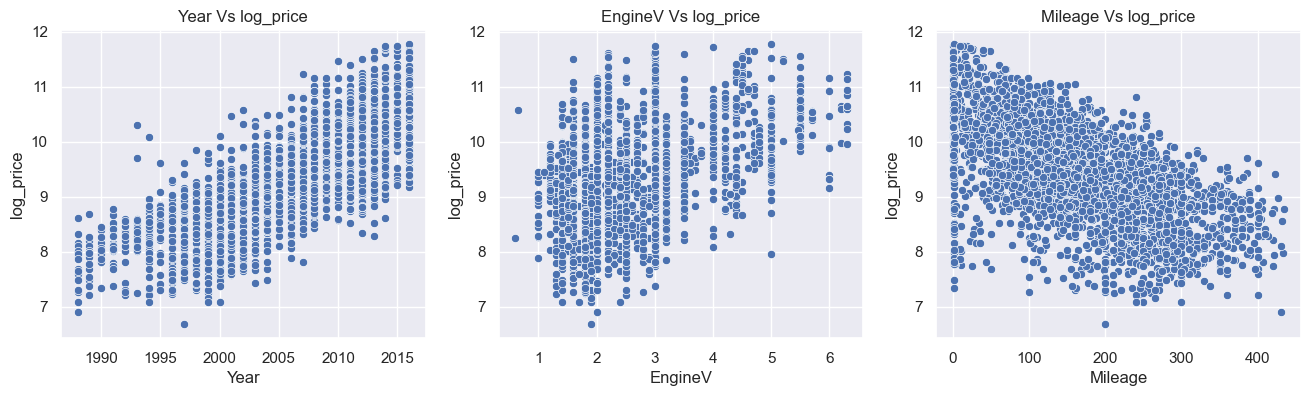

In [287]:
# plotting all the three numerical columns again with log price
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.scatterplot(x=car['Year'], y=car['log_price'])
plt.title('Year Vs log_price')

plt.subplot(1,3,2)
sns.scatterplot(x=car['EngineV'], y=car['log_price'])
plt.title('EngineV Vs log_price')

plt.subplot(1,3,3)
sns.scatterplot(x=car['Mileage'], y=car['log_price'])
plt.title('Mileage Vs log_price')
plt.show()

#### Now whole picture change. 
Here we can obserbeve the linearity of the data with Price column

In [288]:
# droping the Original price column that is no longer needed
car.drop('Price', axis=1, inplace=True)

Up to Now 

* The data have linar relation with target column.
* The is almost normally distributed, that is we took care in previous car cleaning process by taking 99th percentile.


### Now check the Multicollinearity.

this occured when the feature of the data is corealeted with other feature.

In [289]:
car.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'Model', 'log_price'],
      dtype='object')

There can be some multicollinearity in the data that can be assumed like the newer the car will be mileage will be lower. so `Year` and `Milage` will be correleated.

We will use the VIF or Variance inflation factor to check the multicolinearity.

The VIF produce a measure which estimate how much larger the square root of the standerd error of the estimate is compared to a situation wher the variable was completely uncorreleated with other features.


In [290]:
# import VIF from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# taking only numerical column beacuse the categorical will be converted as dummy variable
var = car[['Mileage', 'Year', 'EngineV']]
# var become a dataframe with only three columns


# creating a dataframe
vif_df = pd.DataFrame()

# adding column
vif_df['VIF'] = [vif(var.values, i) for i in range(var.shape[1])]
vif_df['features'] = var.columns

# checking the result
vif_df

,VIF,features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


Now here how it works.

When there is result `1` that means there is no multicolinearity this is also the minimum value of the measure. but it has no upper limit.

Generaly the values are between `1 to 5` or `1< VIF < 5` are consider ok, but it is depend on the problem on hand and the devoloper. he/she will decied the cut-off value from his past experience.

From the result i have got look like the `Year` column is too much corelated with other column. and it will down others feature values. it will be good to drop down the year. column

This [article](https://statisticalhorizons.com/multicollinearity) has more about it.

In [291]:
# deop the year
car.drop('Year', axis=1, inplace=True)

car.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model,log_price
0,BMW,sedan,277,2.00,Petrol,yes,320,8.34
1,Mercedes-Benz,van,427,2.90,Diesel,yes,Sprinter 212,8.97
2,Mercedes-Benz,sedan,358,5.00,Gas,yes,S 500,9.50
3,Audi,crossover,240,4.20,Petrol,yes,Q7,10.04
4,Toyota,crossover,120,2.00,Petrol,yes,Rav 4,9.81


## Now taking care about categorical columns

`Brand`, `Body`, `Engine Type` and `Registration`

In [292]:
# checking the datatypes 
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3867 non-null   object 
 1   Body          3867 non-null   object 
 2   Mileage       3867 non-null   int64  
 3   EngineV       3867 non-null   float64
 4   Engine Type   3867 non-null   object 
 5   Registration  3867 non-null   object 
 6   Model         3867 non-null   object 
 7   log_price     3867 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 241.8+ KB


I will use `pandas` `.get_dummies()` methode for this it will create a new column for all the categorical values. it will increase the dimention of the data.

In [293]:
car_dum = pd.get_dummies(car, drop_first=True) 

# checking the data
car_dum

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.00,8.34,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,427,2.90,8.97,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,358,5.00,9.50,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,240,4.20,10.04,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,120,2.00,9.81,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.50,9.35,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3863,35,1.60,9.79,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3864,9,3.00,11.74,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3865,1,3.50,8.78,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Rearrange the column

In [294]:
car_dum.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch',
       ...
       'Model_Vito', 'Model_X1', 'Model_X3', 'Model_X5', 'Model_X5 M',
       'Model_X6', 'Model_X6 M', 'Model_Yaris', 'Model_Z3', 'Model_Z4'],
      dtype='object', length=308)

In [295]:
# creating new arranged column
col = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

# creating new data frame
car_pos = car_dum[col]
car_pos

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,2.00,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.97,427,2.90,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.50,358,5.00,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.04,240,4.20,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.81,120,2.00,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.35,163,2.50,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3863,9.79,35,1.60,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3864,11.74,9,3.00,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3865,8.78,1,3.50,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [296]:
# saving the last preproccesed data in csv file for model creating
car_pos.to_csv('Car_preproccesed.csv', index=False)
print('Data Saved')

Data Saved


In [297]:
### Here the data preprocessing and EDA is over.


**Linear Regression**


In [298]:
# loading the data
car = pd.read_csv('Car_preproccesed.csv')

car.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,2.00,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.97,427,2.90,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.50,358,5.00,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.04,240,4.20,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.81,120,2.00,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


## Linear Regression


In [299]:
# Declareig the feature and target variable
X = car.drop('log_price', axis=1)
y = car['log_price']

X.shape, y.shape

((3867, 17), (3867,))

### Scaling the data


Note: It is not alwayes consider best practics to scale the dummy variable.beause once they scale they lose all the information. but here I will  neglect that. and will consider every column are seperate features.

In [300]:
from sklearn.preprocessing import StandardScaler

# create instance of scaler
scaler = StandardScaler()

# scaling the data
X_scaled = scaler.fit_transform(X)

X_scaled


array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]], shape=(3867, 17))

In [301]:
# checking the first row of scaling data.
X_scaled[0] # here i can see that all dummies `0` and `1` are gone.

array([ 1.2179077 , -0.47452478,  2.27971827, -0.49255381, -0.29105409,
       -0.35463247, -0.38447151, -0.52998841, -0.26458559, -0.32527677,
        1.27905896, -0.32624802, -0.43276889, -0.41493781, -0.16209221,
        1.33267512,  0.32137366])

### train_test_split


In [302]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3093, 17), (3093,), (774, 17), (774,))

In [303]:
# Creating the regression 
from sklearn.linear_model import LinearRegression

# create instane of model
reg = LinearRegression()

# fit the datab
model = reg.fit(X_train, y_train)

Predicting Values

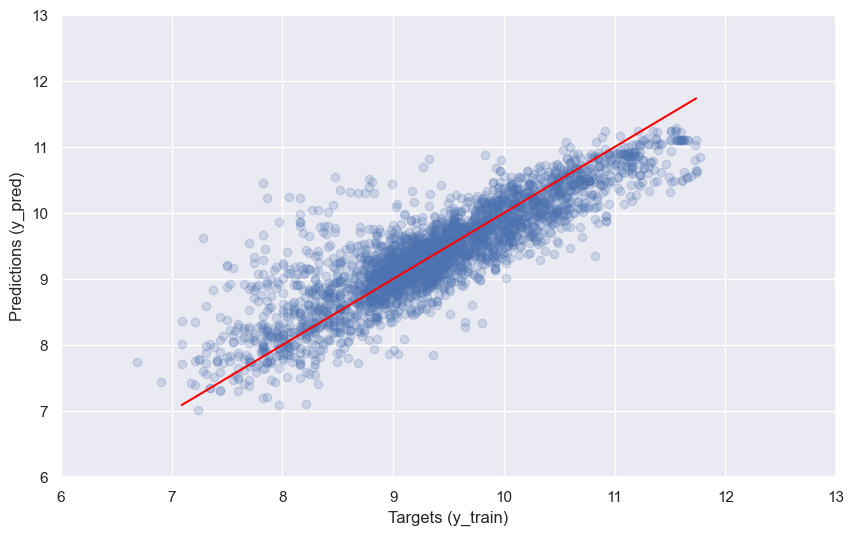

In [304]:
# Evaluate the base Linear regression model

# check the prediction with the original values
y_pred_train = reg.predict(X_train)
plt.figure(figsize=(10,6))
plt.scatter(y_train, y_pred_train, alpha=0.2)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red')

plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_pred)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

The traning prediction looks good, it is not completely random, i can observe the linearity on the plot

Another way to check the `Residual` which is difference between thetargets and the predictions.

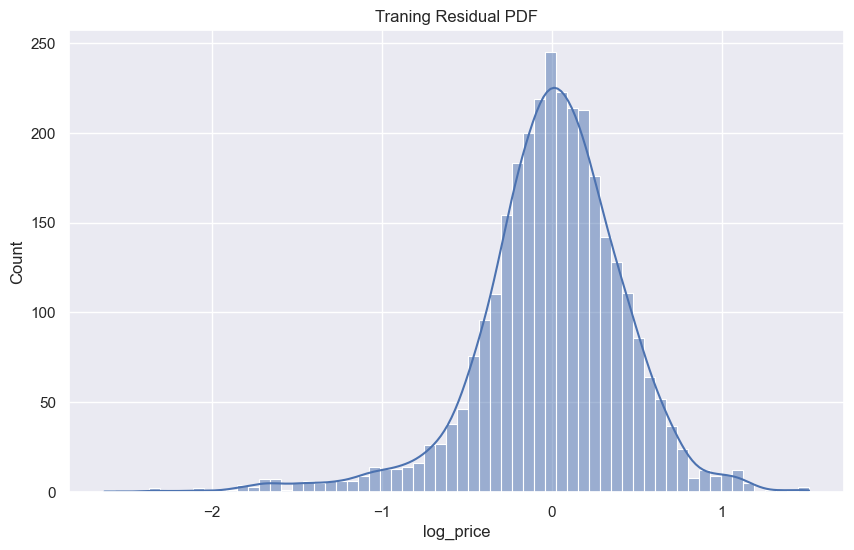

In [305]:
# plotting the distribution of the residual
residual_train = (y_train - y_pred_train)

# ploting the distribution of the residual
plt.figure(figsize=(10,6))
sns.histplot(residual_train,kde=True)
plt.title('Traning Residual PDF')
plt.show()

From this plot i can observe that the most of the value are lie on the near `0` as the mean is `0` i meaas the model is worked better, as most of the difference is `0`, the model is make the prediction as it is on the target value.

In [306]:
# Checking the r2_score
from sklearn.metrics import r2_score,mean_squared_error
y_pred_test=reg.predict(X_test)
r2_train_lr=r2_score(y_train, y_pred_train)
r2_test_lr=r2_score(y_test, y_pred_test)

In [307]:
# Checkinht the rmse
from sklearn.metrics import mean_absolute_error
mae_test_lr= (mean_absolute_error(np.exp(y_test), np.exp(y_pred_test)))
mae_train_lr= (mean_absolute_error(np.exp(y_train), np.exp(y_pred_train)))

The min and max price was `800` and `129222` on the data set and our model make error `10165`. 

The model i have created is not excelent but also not that much bad.

Our model is defining 75% of the variability from the data.

In [308]:
# checking the rmse on test data
y_pred_test=reg.predict(X_test)
rmse_test_lr= np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_test)))
rmse_train_lr= np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_pred_train)))

### Now We will look at the weight and bias


In [309]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.46
1,EngineV,0.21
2,Brand_BMW,0.03
3,Brand_Mercedes-Benz,0.02
4,Brand_Mitsubishi,-0.13
5,Brand_Renault,-0.17
6,Brand_Toyota,-0.05
7,Brand_Volkswagen,-0.08
8,Body_hatch,-0.15
9,Body_other,-0.10


This model is no longer fully generalized since we violated a key rule by scaling the dummy variables. However, we can still interpret the obtained weights.  

- **Positive Weights**: When the value of these features increases, the price also increases.  
- **Negative Weights**: When the value of these features increases, the price decreases.  

I'll now explain the specific weights and their impact on price.

## Now evaluate on Testing data

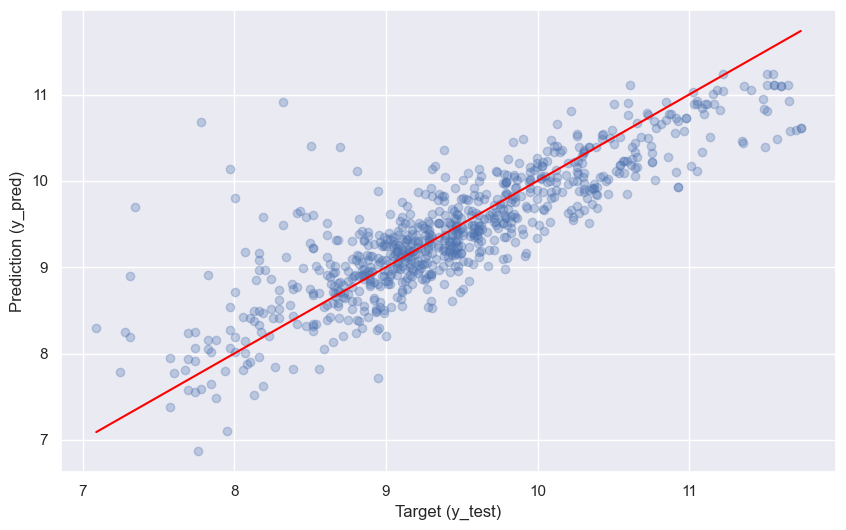

In [310]:
# predict on test data

y_pred = reg.predict(X_test)

# potting the graph
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red')

plt.xlabel('Target (y_test)')
plt.ylabel('Prediction (y_pred)')
plt.show()

In [311]:
# Creating a dataframe to compare the result and prediction.
df_eval = pd.DataFrame(np.exp(y_pred), columns=['Prediction']) # np.exp will reverse the log_tranformation 
# adding column
y_test = y_test.reset_index(drop=True)
df_eval['Target'] = np.exp(y_test)

# checking the performance data 
df_eval.head(10)

,Prediction,Target
0,18328.25,19000.00
1,5256.28,5500.00
2,22185.03,19200.00
3,10102.19,11900.00
4,4000.49,7750.00
5,22253.93,13500.00
6,14263.64,12700.00
7,20584.98,55555.00
8,7309.37,1500.00
9,8336.27,11000.00


In [312]:
df_eval['Residual'] = df_eval['Target'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Target']*100)

# checking the data performance
df_eval.head(10)

,Prediction,Target,Residual,Difference%
0,18328.25,19000.00,671.75,3.54
1,5256.28,5500.00,243.72,4.43
2,22185.03,19200.00,-2985.03,15.55
3,10102.19,11900.00,1797.81,15.11
4,4000.49,7750.00,3749.51,48.38
5,22253.93,13500.00,-8753.93,64.84
6,14263.64,12700.00,-1563.64,12.31
7,20584.98,55555.00,34970.02,62.95
8,7309.37,1500.00,-5809.37,387.29
9,8336.27,11000.00,2663.73,24.22


Now this table tell a lot.

In [313]:
df_eval.tail(10)

,Prediction,Target,Residual,Difference%
764,1960.37,2199.00,238.63,10.85
765,5424.00,7800.00,2376.00,30.46
766,21887.91,23900.00,2012.09,8.42
767,8913.07,6500.00,-2413.07,37.12
768,18082.47,30500.00,12417.53,40.71
769,39166.49,116500.00,77333.51,66.38
770,6060.76,13200.00,7139.24,54.09
771,15649.81,27500.00,11850.19,43.09
772,11164.30,16500.00,5335.70,32.34
773,11114.91,11900.00,785.09,6.60


In [314]:
df_eval.describe()

,Prediction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,16194.85,18602.02,2407.17,39.11
std,13265.84,20139.56,11449.21,97.37
min,964.00,1200.00,-50811.55,0.10
25%,7763.59,7500.00,-1827.31,11.63
50%,11715.38,11900.00,499.37,23.00
75%,20275.68,20999.06,3512.48,39.07
max,76339.58,125000.00,84484.67,1715.17


In [315]:
 # getting all values.
 pd.options.display.max_rows = 20
 # setting all value two digits after dot.
 pd.set_option('display.float_format', lambda x: '%.2f' % x)
 df_eval.sort_values(by=['Difference%'])
 df_eval.head(10)

,Prediction,Target,Residual,Difference%
0,18328.25,19000.00,671.75,3.54
1,5256.28,5500.00,243.72,4.43
2,22185.03,19200.00,-2985.03,15.55
3,10102.19,11900.00,1797.81,15.11
4,4000.49,7750.00,3749.51,48.38
5,22253.93,13500.00,-8753.93,64.84
6,14263.64,12700.00,-1563.64,12.31
7,20584.98,55555.00,34970.02,62.95
8,7309.37,1500.00,-5809.37,387.29
9,8336.27,11000.00,2663.73,24.22


In [316]:
df_eval.tail(10)

,Prediction,Target,Residual,Difference%
764,1960.37,2199.00,238.63,10.85
765,5424.00,7800.00,2376.00,30.46
766,21887.91,23900.00,2012.09,8.42
767,8913.07,6500.00,-2413.07,37.12
768,18082.47,30500.00,12417.53,40.71
769,39166.49,116500.00,77333.51,66.38
770,6060.76,13200.00,7139.24,54.09
771,15649.81,27500.00,11850.19,43.09
772,11164.30,16500.00,5335.70,32.34
773,11114.91,11900.00,785.09,6.60


A key observation here is that the largest differences occur in lower-priced cars. The residuals are all negative, meaning the model consistently overestimates prices.  

From the **Residual PDF plot**, the tail is on the negative side, reinforcing this pattern. This suggests the model is missing something—specifically, it predicts higher prices than the actual values for some cars.  

Possible reasons for this discrepancy:  
1. **The removed `Model` column** – Some car models may have a significant impact on price, which the model is now unable to capture.  
2. **Missing condition-related data** – If a car is damaged, has high repair costs, or other hidden defects, the price will be lower. Since we don’t have this information, the model cannot account for it.  

This insight suggests the need to revisit feature selection or incorporate additional data.

The next thing is creating another model and keep the `Model` Column

In [317]:
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression','LinearRegression'],
    'DataSet':['Train','Test'],
    'MAE': [mae_train_lr,mae_test_lr],
    'RMSE': [rmse_train_lr,rmse_test_lr],
    'R² Score': [r2_train_lr,r2_test_lr]
})

metrics_df

,Model,DataSet,MAE,RMSE,R² Score
0,Linear Regression,Train,5421.25,10165.94,0.76
1,LinearRegression,Test,5872.92,11692.29,0.72



### Random Forest Regressor 
Importing relevent library

In [318]:
# Loding the data.
car = pd.read_csv('Car_cleaned_with_Model.csv')
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


In [319]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in car.columns:
    if car[i].dtypes == 'object':
        car[i] = le.fit_transform(car[i])

In [320]:
# takking X and y
X = car.drop('Price', axis=1)
y = car['Price']

X.shape, y.shape

((3867, 8), (3867,))

In [321]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3093, 8), (3093,), (774, 8), (774,))

In [322]:
from sklearn.preprocessing import StandardScaler

In [323]:
scale=StandardScaler()

In [324]:
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [325]:
# importing RandomForest Regressior
from sklearn.ensemble import  RandomForestRegressor

# creating instance of randomforest regressor
rf_1 = RandomForestRegressor( n_estimators=100,random_state=42)

# checking the hyperparameter of the randomforest 
rf_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [326]:
# first we will create a base model then we will go for hyperparameter tuning.
rf_1.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [327]:
# checking the perofrmance on the training
y_pred_train = rf_1.predict(X_train)

# importing the rmse from sklearn
from sklearn.metrics import  mean_squared_error,mean_absolute_error
mae_train_rf=(mean_absolute_error(y_train, y_pred_train))
print('MAE on Traning data {}'.format(mae_train_rf))

rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE on Traning data {}'.format(rmse_train_rf))


MAE on Traning data 992.8271103608186
RMSE on Traning data 1991.8930035116223


In [328]:
# error on testing data
y_pred_test = rf_1.predict(X_test)
mae_test_rf=(mean_absolute_error(y_test, y_pred_test))
print('MAE on Traning data {}'.format(mae_test_rf))

rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test_rf))

MAE on Traning data 2512.627132962096
RMSE on Testing data 4959.605603055879


In [329]:
# checking the socre on traning data.
from sklearn.metrics import r2_score

y_pred_train = rf_1.predict(X_train)
r2_score_train_rf=r2_score(y_train, y_pred_train)
print('Traning Score: {}'.format(r2_score(y_train, y_pred_train)))

Traning Score: 0.988788444397367


In [330]:
# checking the socre for testing.

y_pred_test = rf_1.predict(X_test)
r2_score_test_rf=r2_score(y_test, y_pred_test)
print('Testing Score: {}'.format(r2_score(y_test, y_pred_test)))

Testing Score: 0.9392766350442162


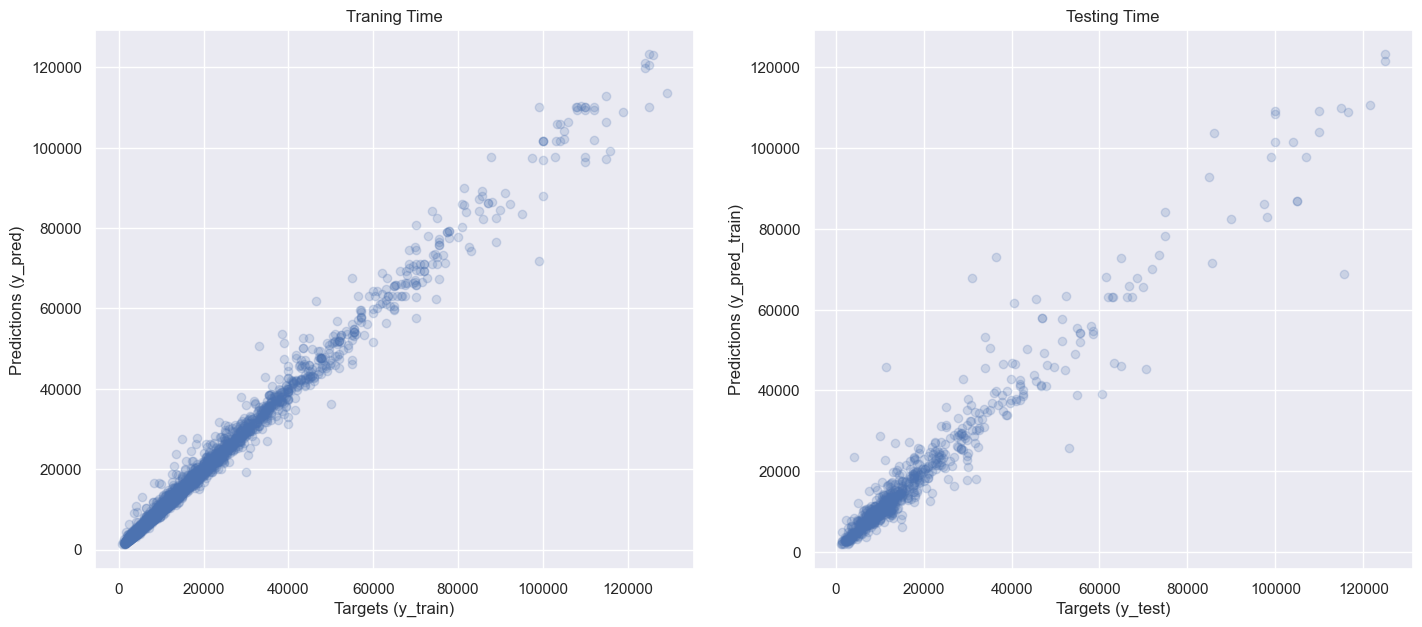

In [331]:
# plotting the traning
# check the prediction with the original values
plt.figure(figsize=(17,7))
y_pred_train = rf_1.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_pred)')
plt.title('Traning Time')

# plotting testing error
y_pred_test = rf_1.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_pred_train)')
plt.title('Testing Time')
plt.show()

In [332]:
metrics_df = pd.DataFrame({

    'Model': ['RandomForestRegressor','RandomForestRegressor'],
    'Dataset': ['Train', 'Test'],
    'MAE': [mae_train_rf, mae_test_rf],
    'RMSE': [rmse_train_rf, rmse_test_rf],
    'R² Score': [r2_score_train_rf, r2_score_test_rf]
})
metrics_df

,Model,Dataset,MAE,RMSE,R² Score
0,RandomForestRegressor,Train,992.83,1991.89,0.99
1,RandomForestRegressor,Test,2512.63,4959.61,0.94


## Checking the residual for base model.

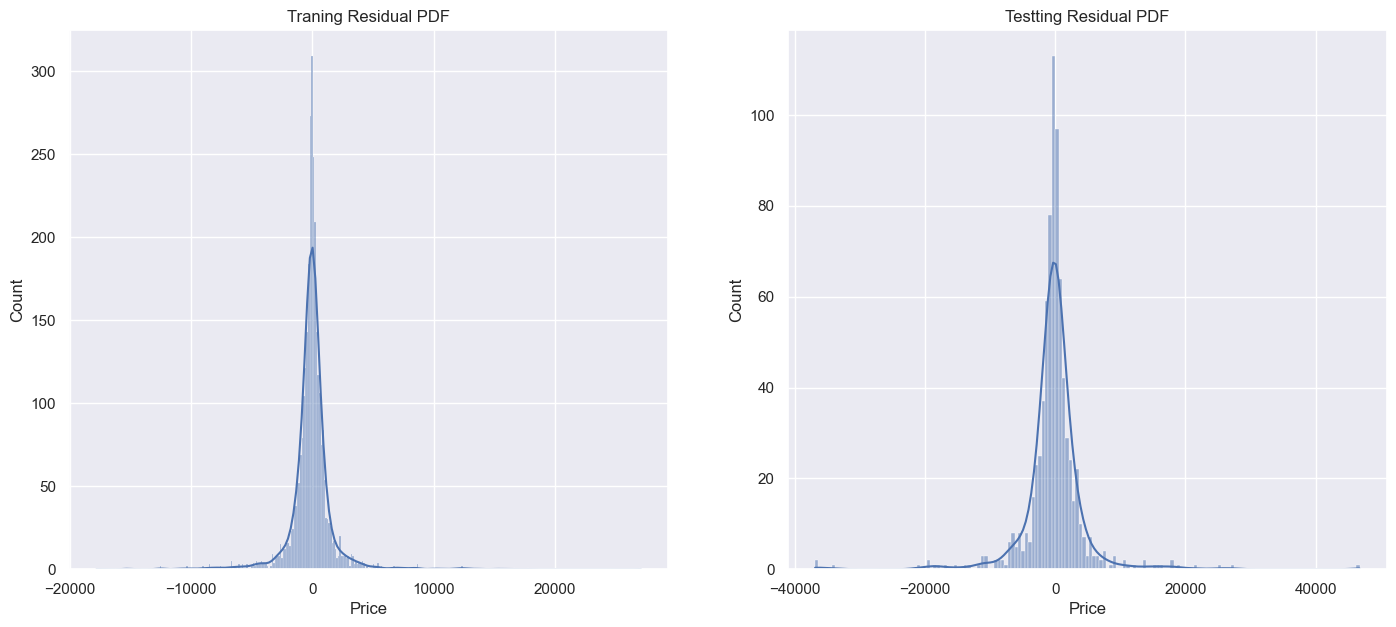

In [333]:
# plotting the distribution of the residual
residual_train = (y_train - rf_1.predict(X_train))
residual_test = (y_test - rf_1.predict(X_test))

# ploting the distribution of the residual on training
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.histplot(residual_train,kde= True)
plt.title('Traning Residual PDF')

# ploting the distribution of the residual
plt.subplot(1,2,2)
sns.histplot(residual_test,kde= True )
plt.title('Testting Residual PDF')
plt.show()

In [334]:
# Creating a dataframe to compare the result and prediction.
df_eval = pd.DataFrame(rf_1.predict(X_test), columns=['Prediction'])
# adding column
y_test = y_test.reset_index(drop=True)
df_eval['Target'] = y_test

# creating residual columns and difference column
df_eval['Residual'] = df_eval['Target'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Target']*100)
# checking the performance data 
df_eval.head(10)

,Prediction,Target,Residual,Difference%
0,17596.01,19000.00,1403.99,7.39
1,5949.89,5500.00,-449.89,8.18
2,25481.95,19200.00,-6281.95,32.72
3,12655.80,11900.00,-755.80,6.35
4,9182.44,7750.00,-1432.44,18.48
5,26945.77,13500.00,-13445.77,99.60
6,13037.73,12700.00,-337.73,2.66
7,54120.24,55555.00,1434.76,2.58
8,4757.50,1500.00,-3257.50,217.17
9,11948.50,11000.00,-948.50,8.62


In [335]:
# getting all values.
pd.options.display.max_rows = 100
# setting all value two digits after dot.
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_final=df_eval.sort_values(by=['Difference%'])
df_final.reindex()
df_final.head(10)

,Prediction,Target,Residual,Difference%
634,9796.15,9800.00,3.85,0.04
755,6796.50,6800.00,3.50,0.05
421,23524.44,23500.00,-24.44,0.10
564,73582.93,73500.00,-82.93,0.11
489,34539.96,34500.00,-39.96,0.12
190,13018.26,13000.00,-18.26,0.14
733,20433.00,20400.00,-33.00,0.16
63,21960.56,22000.00,39.44,0.18
645,18964.50,18999.00,34.50,0.18
723,2295.40,2300.00,4.60,0.20


In [336]:
df_final.tail(10)

,Prediction,Target,Residual,Difference%
19,5828.97,2900.00,-2928.97,101.00
73,22631.00,11200.00,-11431.00,102.06
704,7511.49,3500.00,-4011.49,114.61
454,67853.78,30950.00,-36903.78,119.24
136,12002.93,5000.00,-7002.93,140.06
402,28616.45,10100.00,-18516.45,183.33
8,4757.50,1500.00,-3257.50,217.17
74,7921.99,2400.00,-5521.99,230.08
594,45644.41,11500.00,-34144.41,296.91
59,23513.95,4100.00,-19413.95,473.51


In [337]:
# description of the eval_df
df_eval.describe()

,Prediction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,18815.73,18602.02,-213.72,16.95
std,19518.12,20139.56,4958.20,28.67
min,1788.75,1200.00,-36903.78,0.04
25%,7820.15,7500.00,-1381.62,4.12
50%,11903.76,11900.00,-147.96,9.59
75%,21524.03,20999.06,1013.21,20.66
max,123216.38,125000.00,46763.12,473.51


The `Difference%` column is our only interest, the difference is far better than `Linear Regression`

### Hyperparameter Tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rf_1, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: {:.2f}".format(mse))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error on test set: {:.2f}".format(mae))

r2_score=r2_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(r2_score*100))

In [340]:
rf=RandomForestRegressor(bootstrap= False, max_depth= 30, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators=300)
rf.fit(X_train,y_train)
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)


In [341]:
r2_score_train_rf=r2_score(y_train, y_pred_train)
print('Traning Score: {}'.format(r2_score(y_train, y_pred_train)))

r2_score_test_rf=r2_score(y_test, y_pred_test)
print('Testing Score: {}'.format(r2_score(y_test, y_pred_test)))

mae_train_rf=(mean_absolute_error(y_train, y_pred_train))
print('MAE on Traning data {}'.format(mae_train_rf))

mae_test_rf=(mean_absolute_error(y_test, y_pred_test))
print('MAE on Testing data {}'.format(mae_test_rf))

rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('RMSE on Traning data {}'.format(rmse_train_rf))

rmse_testing_rf = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('RMSE on Testing data {}'.format(rmse_testing_rf))


Traning Score: 0.9988778469417564
Testing Score: 0.9556456348232003
MAE on Traning data 77.587161845233
MAE on Testing data 2257.372356656822
RMSE on Traning data 630.172021398626
RMSE on Testing data 4238.746175836779


Metrices after hyperparameter tuning

In [342]:
metrics_df = pd.DataFrame({

    'Model': ['RandomForestRegressor','RandomForestRegressor'],
    'Dataset': ['Train', 'Test'],
    'MAE': [mae_train_rf, mae_test_rf],
    'RMSE': [rmse_train_rf, rmse_test_rf],
    'R² Score': [r2_score_train_rf, r2_score_test_rf]
})
metrics_df

,Model,Dataset,MAE,RMSE,R² Score
0,RandomForestRegressor,Train,77.59,630.17,1.00
1,RandomForestRegressor,Test,2257.37,4959.61,0.96


### Final Results:

In [343]:
metrics_df = pd.DataFrame({

    'Model': ['RandomForestRegressor','RandomForestRegressor','Linear Regression','LinearRegression'],
    'Dataset': ['Train', 'Test','Train', 'Test'],
    'MAE': [mae_train_rf, mae_test_rf,mae_train_lr,mae_test_lr],
    'RMSE': [rmse_train_rf, rmse_test_rf,rmse_train_lr,rmse_test_lr],
    'R² Score': [r2_score_train_rf, r2_score_test_rf,r2_train_lr,r2_test_lr]
})
metrics_df

,Model,Dataset,MAE,RMSE,R² Score
0,RandomForestRegressor,Train,77.59,630.17,1.00
1,RandomForestRegressor,Test,2257.37,4959.61,0.96
2,Linear Regression,Train,5421.25,10165.94,0.76
3,LinearRegression,Test,5872.92,11692.29,0.72


In [344]:
df = metrics_df[metrics_df['Dataset'] == 'Test']
df=df.drop(columns='Dataset')

<Figure size 1000x900 with 0 Axes>

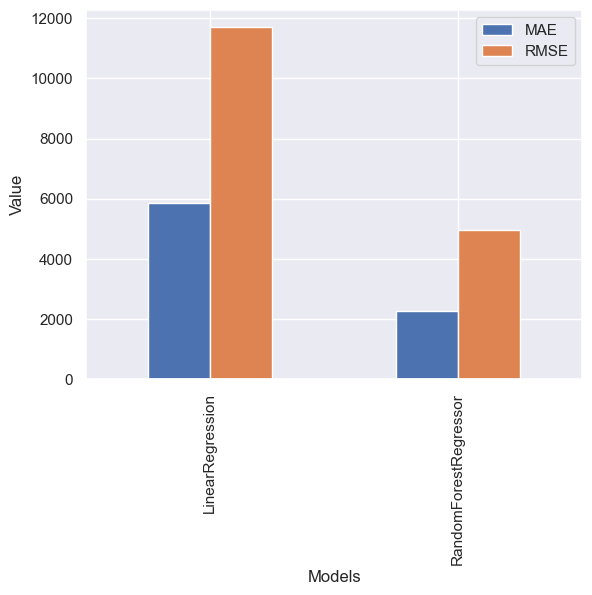

In [345]:
data=df.groupby('Model').sum()[['MAE','RMSE']]
plt.figure(figsize=(10,9))
data.plot(kind='bar',stacked=False)
plt.xlabel("Models")
plt.ylabel("Value")
plt.show()

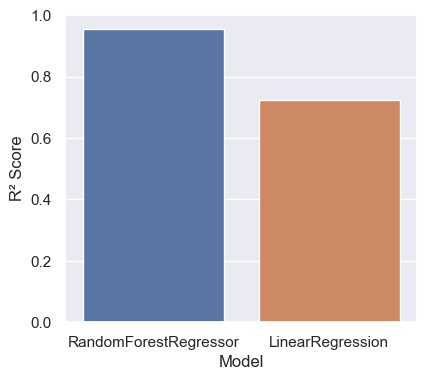

In [346]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(data=df,x='Model',y='R² Score',hue='Model')
plt.show()

* Random Forest Regression is optimal choice for this dataset.